In [1]:
# Import modules for our task

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as scs
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

In [20]:
# Import system libraries and our Scripts

import os
import sys
import warnings
warnings.filterwarnings('ignore')
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from DistributionPlots import DistributionPlots
from HypothesisPlot import HypothesisPlot
DP = DistributionPlots() 
HP = HypothesisPlot()

In [21]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)

In [22]:
# load cleaned data

data  = pd.read_csv('../data/clean_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   1243 non-null   int64 
 1   auction_id   1243 non-null   object
 2   experiment   1243 non-null   object
 3   date         1243 non-null   object
 4   hour         1243 non-null   int64 
 5   device_make  1243 non-null   object
 6   platform_os  1243 non-null   int64 
 7   browser      1243 non-null   object
 8   aware        1243 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 87.5+ KB


In [23]:
# displaying dataset
data.head(10)

,Unnamed: 0,auction_id,experiment,date,hour,device_make,platform_os,browser,aware
0,2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0
1,16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1
2,20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0
3,23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1
4,27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0
5,39,013e45cf-e388-46a4-9c5b-a34303613940,exposed,2020-07-10,2,Generic Smartphone,6,Chrome Mobile,0
6,45,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1
7,46,01905bae-fc59-475e-b2b4-09b78163c961,exposed,2020-07-05,6,I3312,6,Chrome Mobile WebView,0
8,48,01985992-d70b-4258-a3a1-60ac5e17bce6,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0
9,56,01d44c23-d255-4ff4-ae23-752834801bc8,exposed,2020-07-03,14,Generic Smartphone,6,Chrome Mobile,0


In [24]:
# Drop unkown column 
data = data.drop(columns = ['Unnamed: 0'], axis=1)

In [25]:

#displaying the Information about the numeric data
data.describe()

,hour,platform_os,aware
count,1243.00,1243.00,1243.00
mean,11.52,5.99,0.46
std,5.77,0.12,0.50
min,0.00,5.00,0.00
25%,7.00,6.00,0.00
50%,13.00,6.00,0.00
75%,15.00,6.00,1.00
max,23.00,6.00,1.00


In [26]:
data.groupby(['experiment']).count()

,auction_id,date,hour,device_make,platform_os,browser,aware
experiment,,,,,,,
control,586,586,586,586,586,586,586
exposed,657,657,657,657,657,657,657


In [27]:
data.shape

(1243, 8)

In [28]:
# Select columns for our analysis

check_exp_df = data[['auction_id', 'experiment', 'aware']]
check_exp_df.shape

(1243, 3)

In [29]:
check_exp_df = check_exp_df.set_index('auction_id')
check_exp_df.head(5)

,experiment,aware
auction_id,,
0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,0
008aafdf-deef-4482-8fec-d98e3da054da,exposed,1
00a1384a-5118-4d1b-925b-6cdada50318d,exposed,0
00b6fadb-10bd-49e3-a778-290da82f7a8d,control,1
00ebf4a8-060f-4b99-93ac-c62724399483,control,0


In [30]:
summary_df = check_exp_df.pivot_table( index='experiment', aggfunc='sum')
summary_df['total'] = check_exp_df.pivot_table( index='experiment', aggfunc='count')
summary_df['rate'] = check_exp_df.pivot_table( index='experiment') 
summary_df = summary_df.reindex(['aware', 'total', 'rate'], axis=1)
summary_df 

,aware,total,rate
experiment,,,
control,264,586,0.45
exposed,308,657,0.47


The *aware* column indicates that how many users responded yes to the Brand Impact Optimiser (BIO) questionnaire for the given experiment group from the total involved users in *total* column. 

In [31]:
# P values of the two groups

exp_rate = summary_df['rate']['exposed']
cont_rate = summary_df['rate']['control']
diff = exp_rate - cont_rate
diff

0.018285619295484168

The conversion rate difference between the two groups is 1.82%. Eventhough this is a good sign but this is not enough evidence for us to confidently make a decision. At this point we have not measured how confident we are in this result. This can be mitigated by looking at the distributions of the two groups.


### Compare the Two Groups

In [32]:
# Initializing variables based on data
# Where C stands for Control, E stands for Exposed and cr stands for Conversation rate

C_aware = summary_df['aware']['control']
E_aware = summary_df['aware']['exposed']
C_total = summary_df['total']['control'] 
E_total = summary_df['total']['exposed']

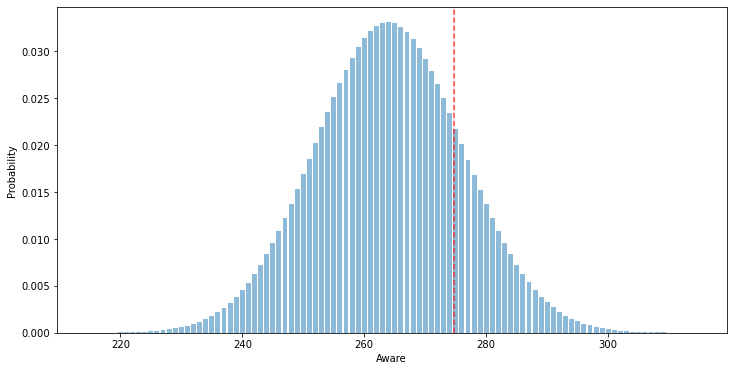

In [33]:
# Control group distribution with probability of getting the result from our exposed group

DP.cont_distribution(C_aware, C_total, cont_rate, exp_rate)

The distribution for the control group is shown in blue and the result from the test group is indicated by the red dashed line. We can see that the probability of getting the result from the test group was very low. However, the probability does not convey the confidence level of the results. It does not take the sample size of our test group into consideration.  

#### Binomial Distribution

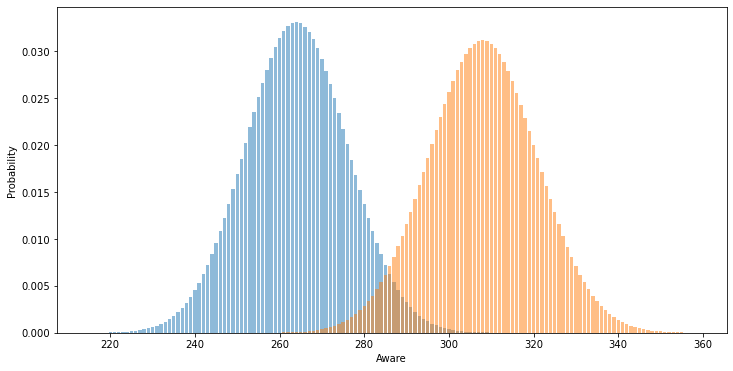

In [34]:
# Comparison of control and exposed groups distribution against each other
# by plotting the test group results as a binomial distribution

DP.cont_exp_distribution(C_aware, E_aware, C_total, E_total, cont_rate, exp_rate)

From this plot we can undestand that the test group converted more users than the control group. We can also see that the peak of the test group results is lower than the control group.

Let us Standardize the data and compare the probability of successes, ***p***, for both groups - using Bernoulli Distribution and the Central Limit Theorem.

Find the standard error of the two groups

In [35]:
SE_C = np.sqrt(cont_rate * (1-cont_rate)) / np.sqrt(C_total)
SE_E = np.sqrt(exp_rate * (1-exp_rate)) / np.sqrt(E_total)

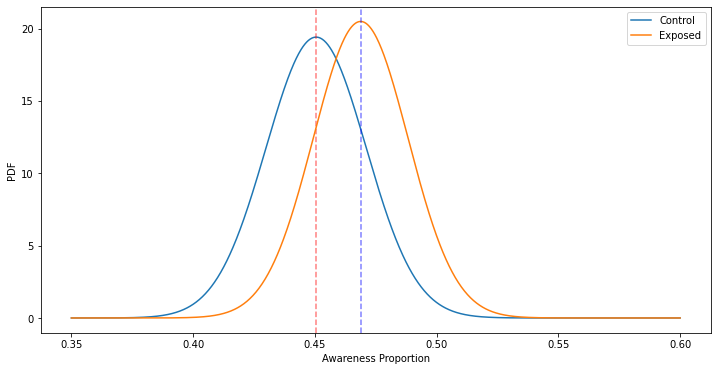

In [36]:
# Plot null and alternative hypotheses

DP.null_alt_distribution1(SE_C, SE_E, cont_rate, exp_rate) 

The graph in blue is the control group distribution and in orange is the exposed group distribution. The dashed lines represent the mean conversion rate for each group. The distance between the red dashed line and the blue dashed line is equal to mean difference between the control and test group.

#### Standard Deviation 

In [37]:
std_cont = np.sqrt(cont_rate * (1 - cont_rate) / C_total)
std_exp = np.sqrt(exp_rate * (1 - exp_rate) / E_total)
std_cont, std_exp

(0.02055339057798332, 0.019468837373132736)

By now we are ready to construct the distributions for the null hypothesis and the alternative hypothesis.

#### Compare the Null Hypothesis vs. the Alternative Hypothesis

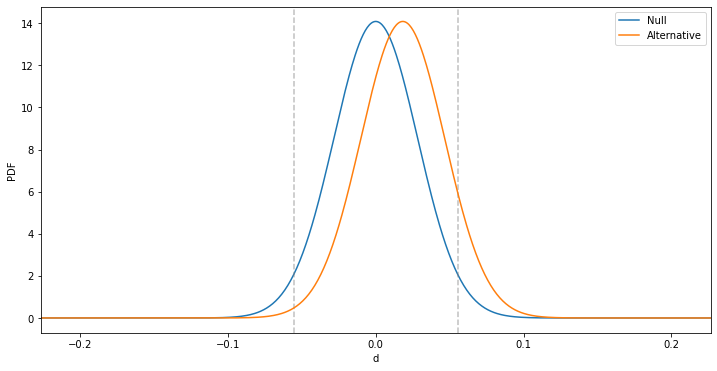

In [38]:
HP.abplot(C_total, E_total, cont_rate, diff)

Fortunately, both curves are identical in shape, so we can just compare the distance between the means of the two distributions. 

#### Calculate z-score and p-value.

In [39]:
z_score = diff / np.sqrt(std_cont**2 + std_exp**2)
print(f"z-score is -> {z_score:0.5f}")
print(f"p-value is -> {scs.norm().sf(z_score):0.5f}")

z-score is -> 0.64590
p-value is -> 0.25917


Our p-value 0.259 is greater than 0.05 (i.e., the significance level). Due to this reason, we failed to reject the Null hypotesis.

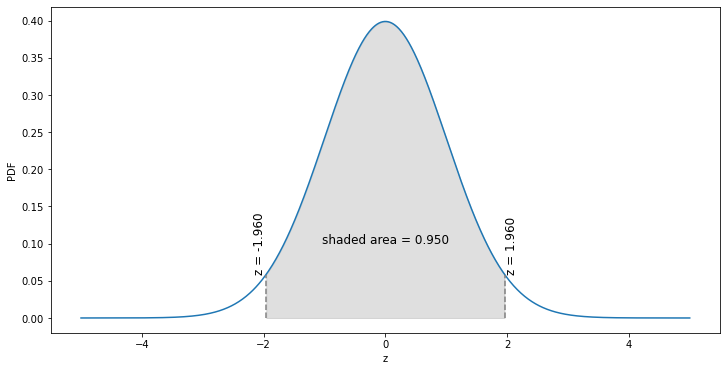

In [40]:
HP.zplot(area=0.95)

#### Statistical Power and Significance Level

We can return more visualizations by adding the parameters to True

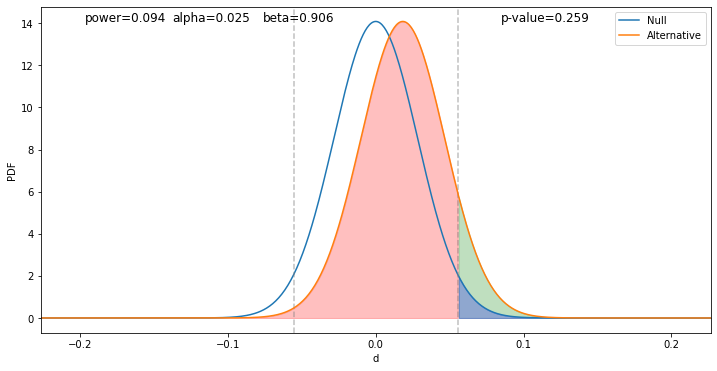

In [41]:
HP.abplot(C_total, E_total, cont_rate, diff, show_power=True, show_alpha=True, show_beta=True, show_p_value=True)

The gray dashed lines are confidence interval at 95% (0.05).
We have get a p-value of 0.259 that is greater than our significance level, 0.05. Based on the p-value we failed to reject the Null hypotesis.

As we can see we get small value for power which is 9.4 %. This indicates there is 90.6 % chance that we can make a type-II error. This indicates there is a very high probability that we have made a type-II error. We need to gather more data to make a sounding conclusion from this testing.

#### Conducting an Optimal Sample Size
Lets consider how much more data we need to get the power to 80%.

In [42]:
def min_sample_size(bcr, mde, power=0.8, sig_level=0.05):
    standard_norm = scs.norm(0, 1)
    Z_beta = standard_norm.ppf(power)
    Z_alpha = standard_norm.ppf(1-sig_level/2)
    pooled_prob = (bcr + bcr+mde) / 2
    min_N = (2 * pooled_prob * (1 - pooled_prob) * (Z_beta + Z_alpha)**2/ mde**2)
    return min_N

In [43]:
power = 0.8
sig_level = 0.05
sample_80 = round(min_sample_size(cont_rate, diff, power,  sig_level))
print(f'Minimum sample size for 80% power is : {sample_80} ')

Minimum sample size for 80% power is : 11661 


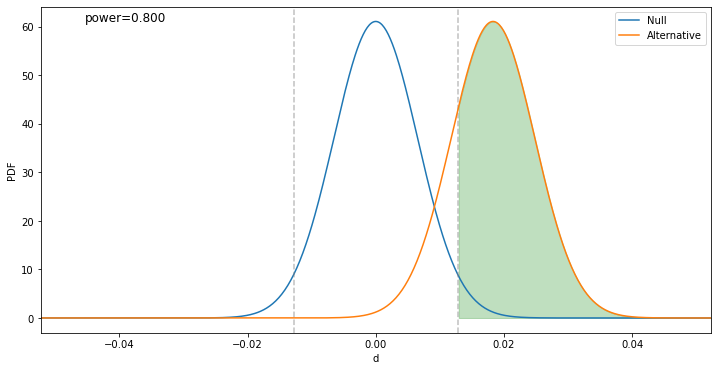

In [44]:
HP.abplot(sample_80, sample_80, cont_rate, diff, show_power=True)

How much more data we need to get the power to 90 % .

In [45]:
power = 0.9
sig_level = 0.05
sample_80 = round(min_sample_size(cont_rate, diff, power,  sig_level))
print(f'Minimum sample size for 90% power is : {sample_80} ')

Minimum sample size for 90% power is : 15610 


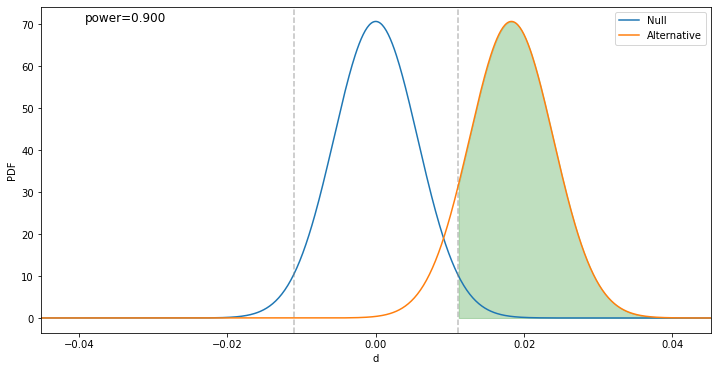

In [46]:
HP.abplot(sample_80, sample_80, cont_rate, diff, show_power=True)

Let us decrease the significance level

In [47]:
power = 0.8
sig_level = 0.1
sample_80 = round(min_sample_size(cont_rate, diff, power,  sig_level))
print(f'Minimum sample size for 80% power is : {sample_80} ')

Minimum sample size for 80% power is : 9185 


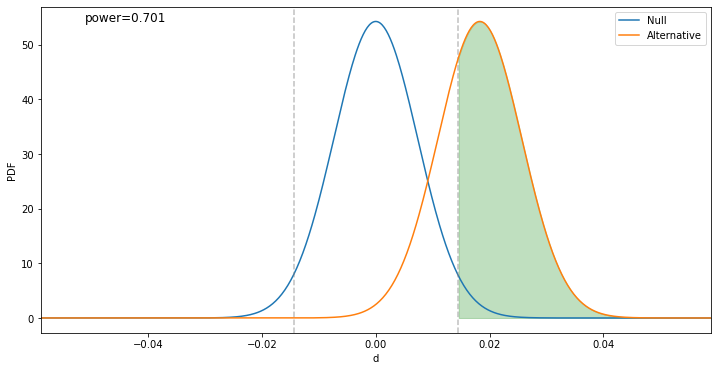

In [48]:
HP.abplot(sample_80, sample_80, cont_rate, diff, show_power=True)

##### Reference: [The Math behind A/B Testing](https://towardsdatascience.com/the-math-behind-a-b-testing-with-example-code-part-1-of-2-7be752e1d06f)